# Author : Pathan Sajid Rouf

#### Innomatics Research Labs - Data Science October_2021

#### Task 3 - Missing Value + Outlier + ML
 
#### Objective:  To predict the salary of adult, is it  <=50k or >50k`


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/sajid/Desktop/Innomatic/CSV/adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### `skewness ------------------------`
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.


In [6]:
data.skew()

age                 0.557580
fnlwgt              1.438892
educational-num    -0.316525
capital-gain       11.894659
capital-loss        4.569809
hours-per-week      0.238750
dtype: float64

### `kurtosis  -----------------------------`
- Kurtosis is a measure of the “tailedness” of the probability distribution. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad). 

In [7]:
data.kurtosis()

age                 -0.184269
fnlwgt               6.057848
educational-num      0.625745
capital-gain       152.693096
capital-loss        20.014346
hours-per-week       2.951059
dtype: float64

## `Univariate Analysis ---------------------------------------------------`
### `Continious Column`

### `age`

<AxesSubplot:xlabel='age', ylabel='Density'>

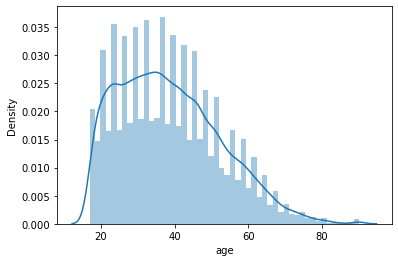

In [8]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='age'>

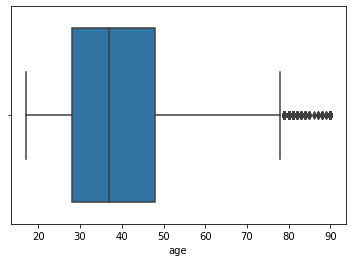

In [9]:
sns.boxplot(data['age'])

### `fnlwgt`

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

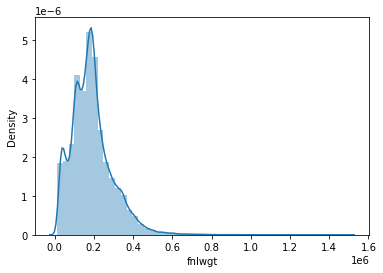

In [10]:
sns.distplot(data['fnlwgt'])

<AxesSubplot:xlabel='fnlwgt'>

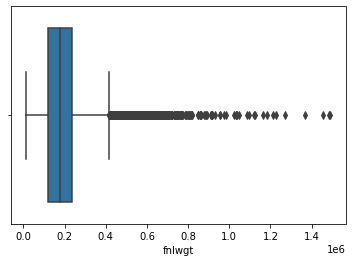

In [11]:
sns.boxplot(data['fnlwgt'])

### `educational-num`

<AxesSubplot:xlabel='educational-num', ylabel='Density'>

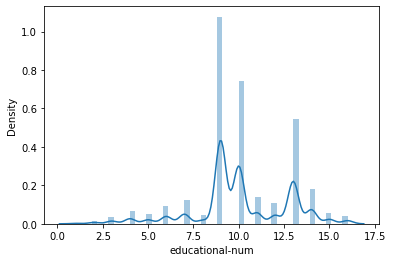

In [12]:
sns.distplot(data['educational-num'])

<AxesSubplot:xlabel='educational-num'>

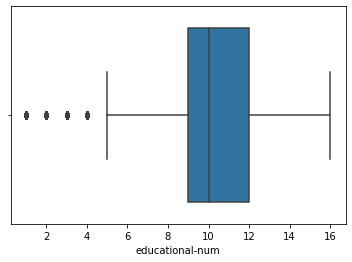

In [13]:
sns.boxplot(data['educational-num'])

### `capital-gain`

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

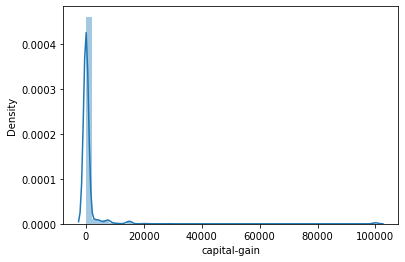

In [14]:
sns.distplot(data['capital-gain'])

<AxesSubplot:xlabel='capital-gain'>

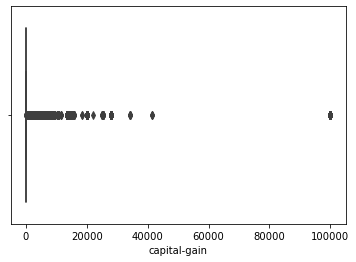

In [15]:
sns.boxplot(data['capital-gain'])

### `capital-loss`

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

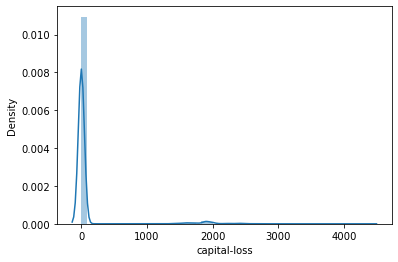

In [16]:
sns.distplot(data['capital-loss'])

<AxesSubplot:xlabel='capital-loss'>

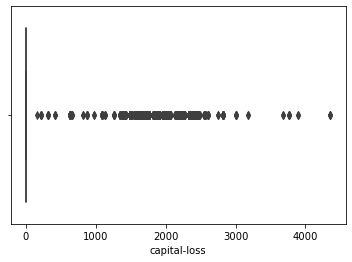

In [17]:
sns.boxplot(data['capital-loss'])

### `hours-per-week`

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

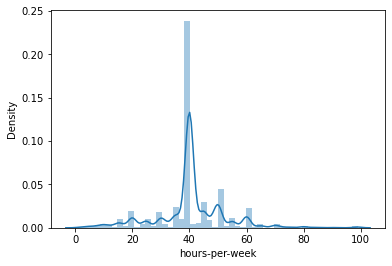

In [18]:
sns.distplot(data['hours-per-week'])

<AxesSubplot:xlabel='hours-per-week'>

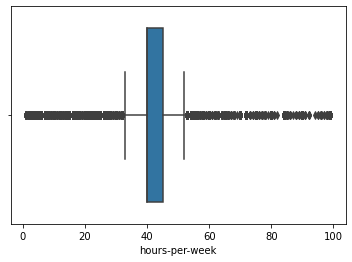

In [19]:
sns.boxplot(data['hours-per-week'])

### `Categorical Column`

### `workclass`

<AxesSubplot:xlabel='workclass', ylabel='count'>

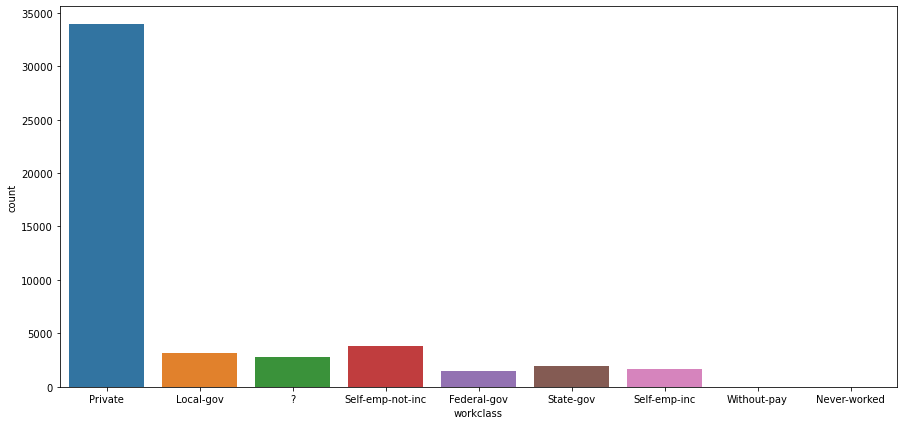

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(data['workclass'])

### `education`

<AxesSubplot:xlabel='education', ylabel='count'>

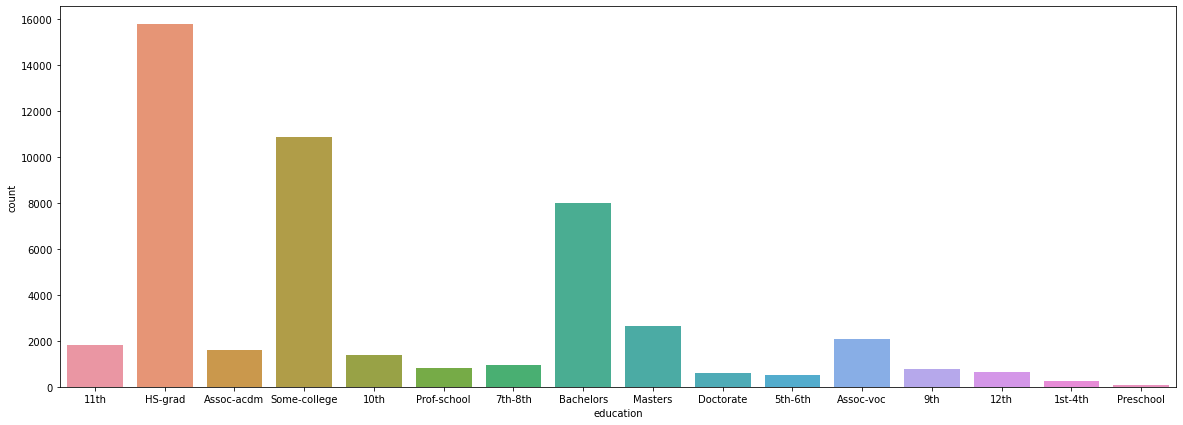

In [21]:
plt.figure(figsize=(20,7))
sns.countplot(data['education'])

### `marital status`

<AxesSubplot:xlabel='marital-status', ylabel='count'>

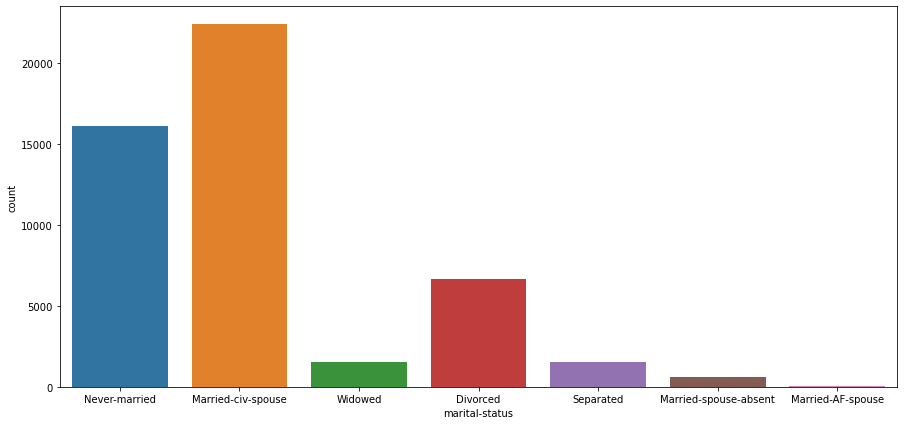

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(data['marital-status'])

### `occupation`

<AxesSubplot:xlabel='occupation', ylabel='count'>

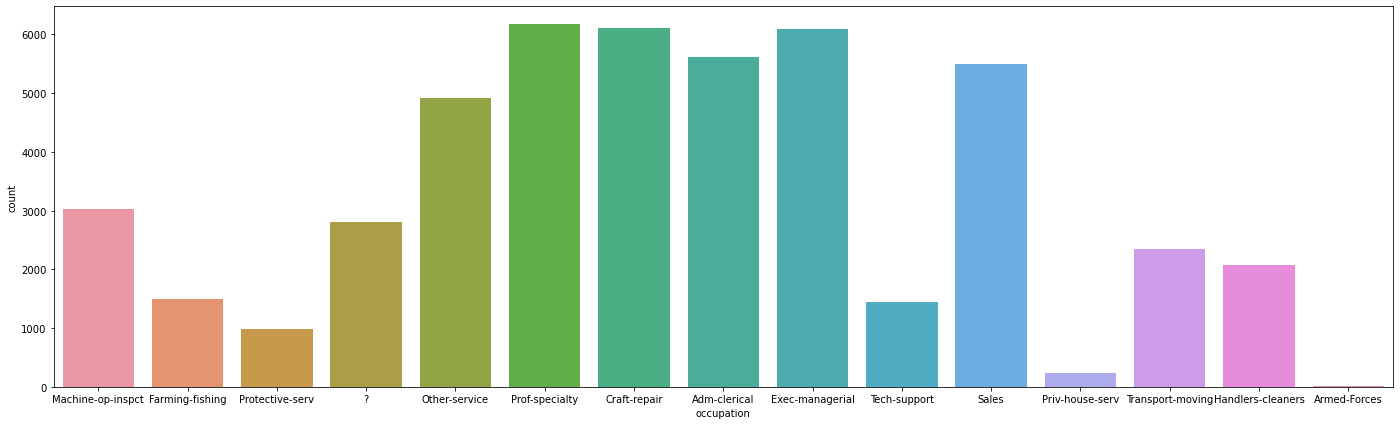

In [23]:
plt.figure(figsize=(24,7))
sns.countplot(data['occupation'])      

### `relationship`

<AxesSubplot:xlabel='relationship', ylabel='count'>

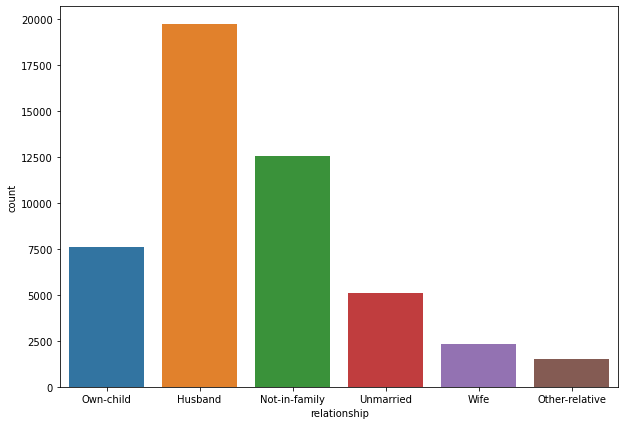

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(data['relationship'])

### `race`

<AxesSubplot:xlabel='race', ylabel='count'>

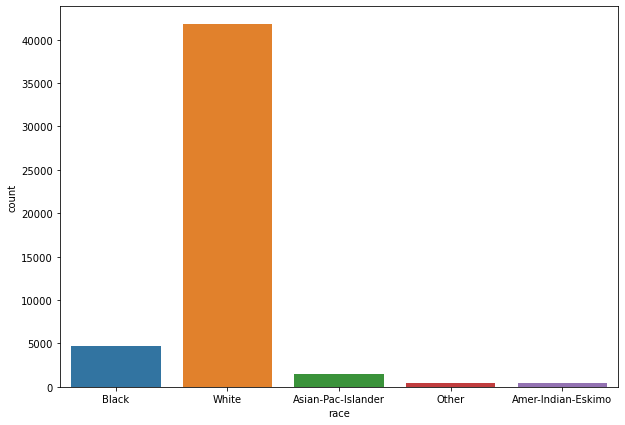

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(data['race'])

### `gender`

<AxesSubplot:xlabel='gender', ylabel='count'>

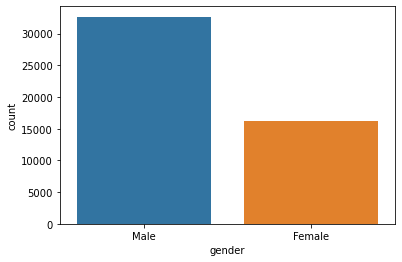

In [26]:
sns.countplot(data['gender'])

### `native-country`

In [27]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

### `income`

<AxesSubplot:xlabel='income', ylabel='count'>

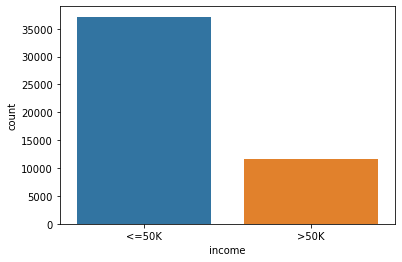

In [28]:
sns.countplot(data['income'])

#### `To check correlation between numerical variables`

<AxesSubplot:>

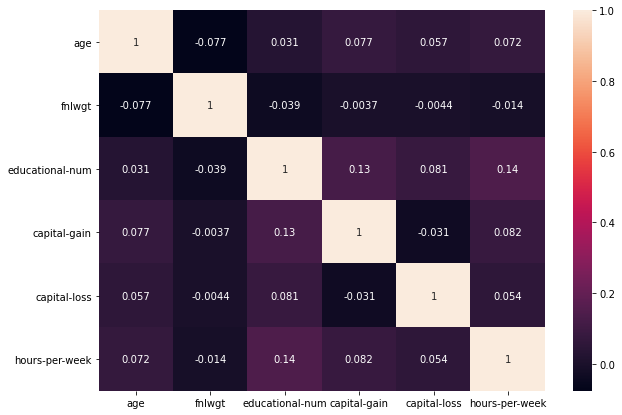

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

## `Bivariate Analysis ----------------------------------------------`

In [30]:
target = 'income'
cont_columns = data.select_dtypes(['int64','float64']).columns
cat_columns = list(filter(lambda x: x!='income',data.select_dtypes('object').columns))

In [31]:
cont_columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [32]:
cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

### `Between numerical columns`

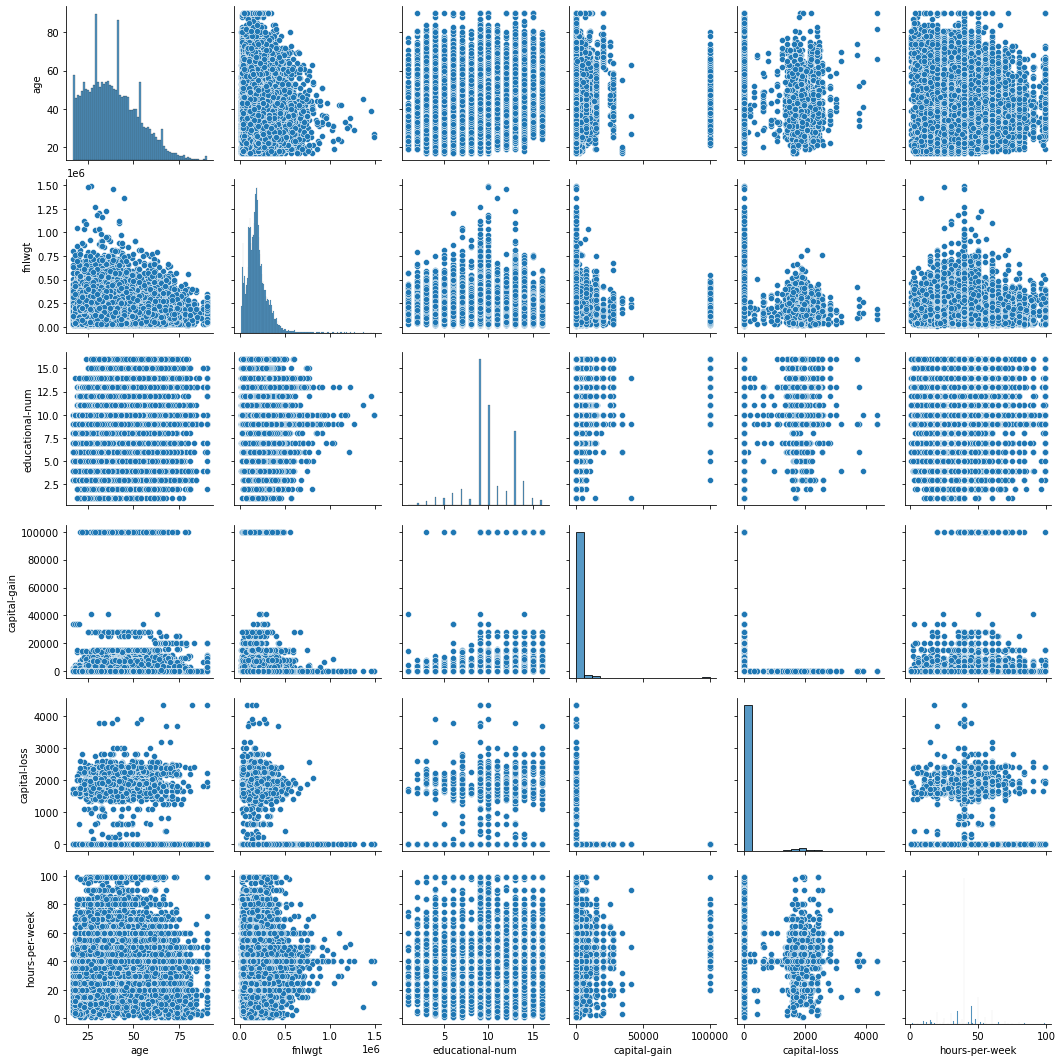

In [33]:
sns.pairplot(data)

### `Between numrical columns and target variable`

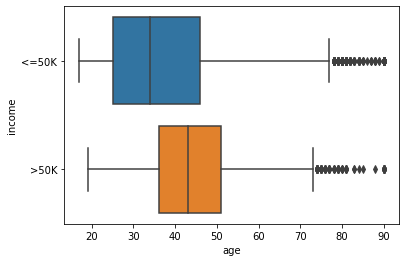

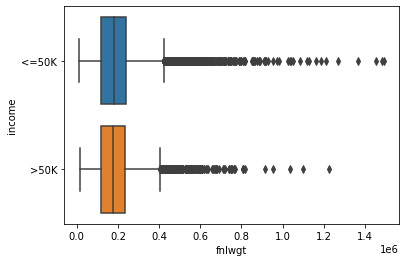

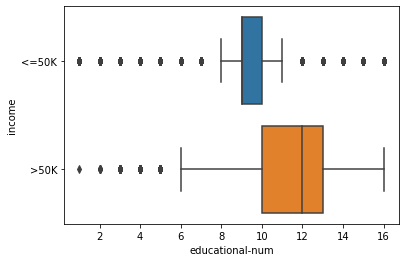

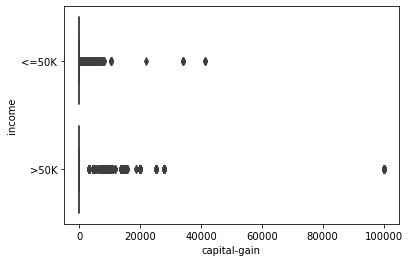

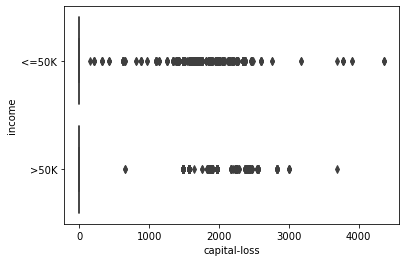

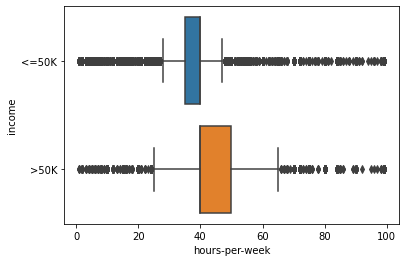

In [34]:
for i in cont_columns:
    sns.boxplot(data[i],y=data['income'])
    plt.show()

### `Data Cleaning and transformation ------------------------------------------------`

### `Numerical variables`
#### `age`

<AxesSubplot:xlabel='age', ylabel='Density'>

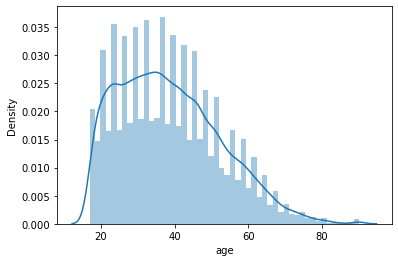

In [35]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='age'>

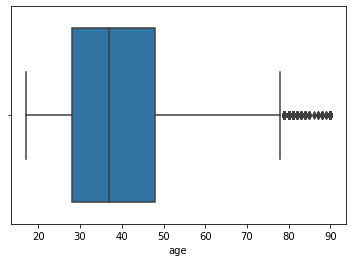

In [36]:
sns.boxplot(data['age'])

#### `data transformation to remove outliers ( np.log ).....changes to be done while creating pipeline`

In [37]:
data['age'] = np.log(data['age'])

<AxesSubplot:xlabel='age'>

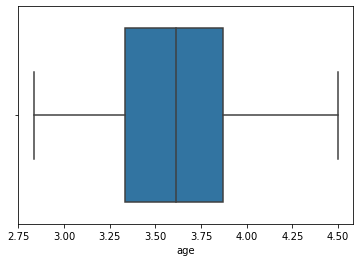

In [38]:
sns.boxplot(data['age'])

#### `fnlwgt`

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

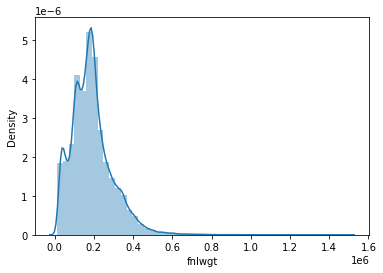

In [39]:
sns.distplot(data['fnlwgt'])

<AxesSubplot:xlabel='fnlwgt'>

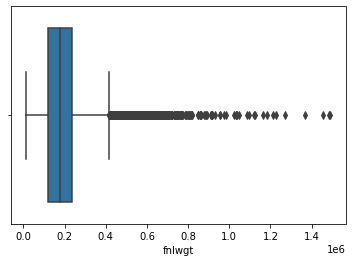

In [40]:
sns.boxplot(data['fnlwgt'])

In [41]:
data['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [42]:
data['fnlwgt']

0        226802
1         89814
2        336951
3        160323
4        103497
          ...  
48837    257302
48838    154374
48839    151910
48840    201490
48841    287927
Name: fnlwgt, Length: 48842, dtype: int64

In [43]:
limit=np.percentile(data['fnlwgt'],99)
data = data[data['fnlwgt'] <= limit]   # remove outliers

<AxesSubplot:xlabel='fnlwgt'>

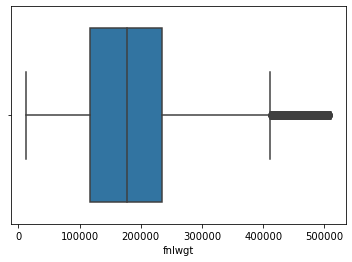

In [44]:
sns.boxplot(data['fnlwgt'])

In [45]:
data['fnlwgt'] = np.sqrt(data['fnlwgt'])

<AxesSubplot:xlabel='fnlwgt'>

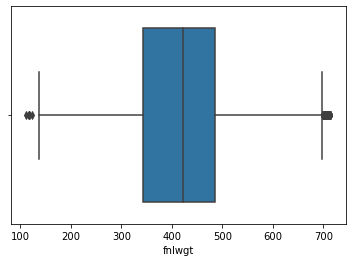

In [46]:
sns.boxplot(data['fnlwgt'])

#### `data transformation to remove outliers ( np.sqrt ).....changes to be done while creating pipeline`

In [47]:
data.shape

(48353, 15)

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

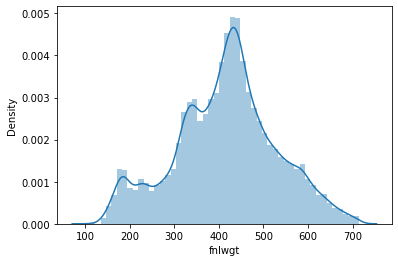

In [48]:
sns.distplot(data['fnlwgt'])

#### `educational-num`

<AxesSubplot:xlabel='educational-num', ylabel='Count'>

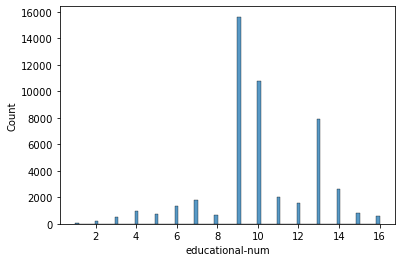

In [49]:
sns.histplot(data['educational-num'])

In [50]:
data['educational-num'].value_counts()

9     15626
10    10775
13     7931
14     2632
11     2049
7      1792
12     1595
6      1369
4       948
15      830
5       745
8       646
16      591
3       502
2       242
1        80
Name: educational-num, dtype: int64

#### `capital-gain`

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

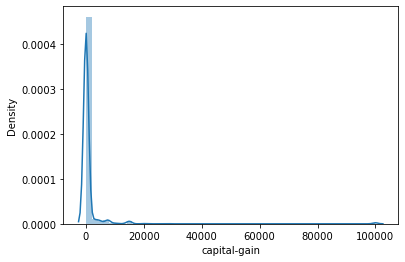

In [51]:
sns.distplot(data['capital-gain'])

<AxesSubplot:xlabel='capital-gain'>

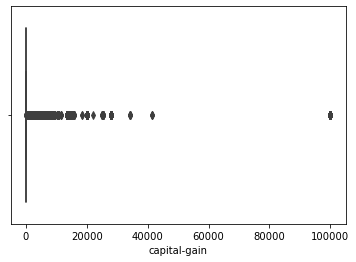

In [52]:
sns.boxplot(data['capital-gain'])

In [53]:
from scipy import stats        
data = data[(stats.zscore(data['capital-gain'])>-3) & (stats.zscore(data['capital-gain'])<3)]

<AxesSubplot:xlabel='capital-gain'>

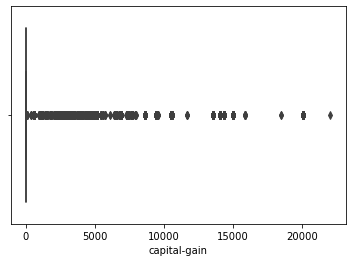

In [54]:
sns.boxplot(data['capital-gain'])

#### `capital-loss`

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

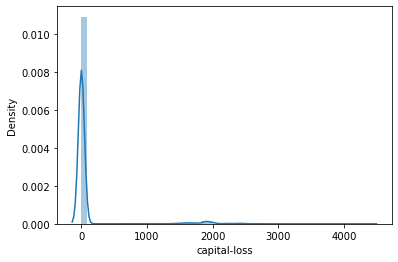

In [55]:
sns.distplot(data['capital-loss'])

<AxesSubplot:xlabel='capital-loss'>

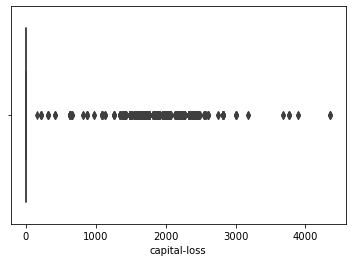

In [56]:
sns.boxplot(data['capital-loss'])

In [57]:
from scipy import stats        
data = data[(stats.zscore(data['capital-loss'])>-3) & (stats.zscore(data['capital-loss'])<3)]

<AxesSubplot:xlabel='capital-loss'>

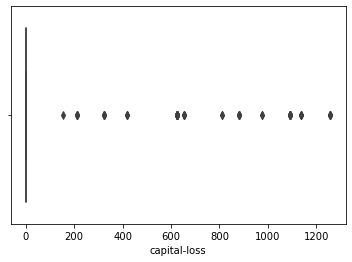

In [58]:
sns.boxplot(data['capital-loss'])

#### `Create a new variable to settle wierdness of above two columns`

In [59]:
data['capital-gain']

0            0
1            0
2            0
3         7688
4            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital-gain, Length: 45828, dtype: int64

In [60]:
data['capital-loss']

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    0
Name: capital-loss, Length: 45828, dtype: int64

In [61]:
data['total_capital'] = data['capital-gain'] - data['capital-loss']   # we assume this relationship

<AxesSubplot:xlabel='total_capital', ylabel='Density'>

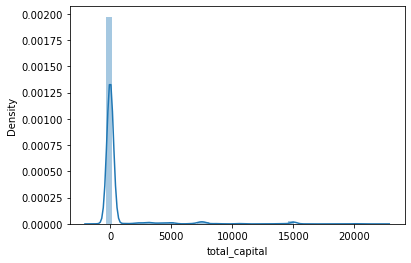

In [62]:
sns.distplot(data['total_capital'])

In [63]:
limit=np.percentile(data['total_capital'],95)
data = data[data['total_capital'] <= limit]   # remove outliers

<AxesSubplot:xlabel='total_capital', ylabel='Density'>

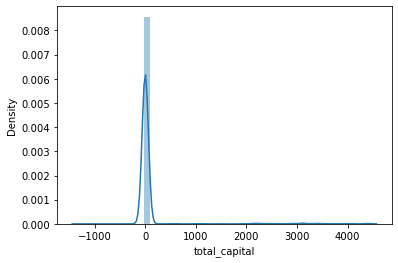

In [64]:
sns.distplot(data['total_capital'])

<AxesSubplot:xlabel='total_capital'>

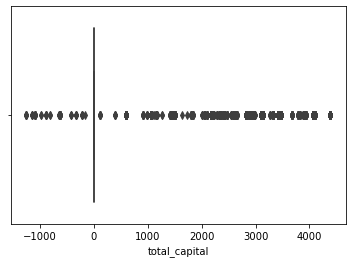

In [65]:
sns.boxplot(data['total_capital'])

#### `hours-per-week`

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

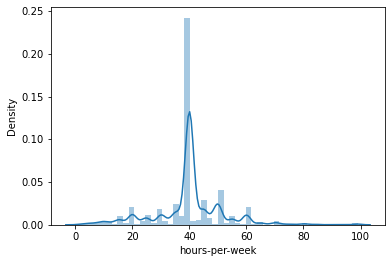

In [66]:
sns.distplot(data['hours-per-week'])

<AxesSubplot:xlabel='hours-per-week'>

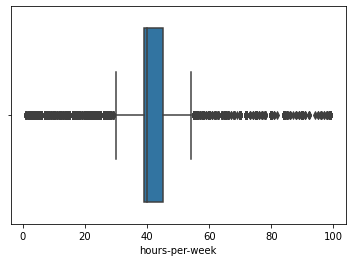

In [67]:
sns.boxplot(data['hours-per-week'])

#### `z-score to remove outliers`

In [68]:
from scipy import stats        
data = data[(stats.zscore(data['hours-per-week'])>-3) & (stats.zscore(data['hours-per-week'])<3)]

<AxesSubplot:xlabel='hours-per-week'>

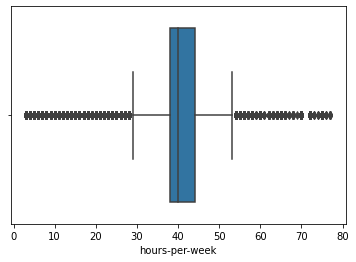

In [69]:
sns.boxplot(data['hours-per-week'])

### `T-Test ( predictors vs response )`

In [70]:
cont_columns = cont_columns.to_list()
cont_columns.append('total_capital')

In [71]:
from scipy.stats import ttest_ind

for i in cont_columns:
    target_yes = data.loc[data['income']=='<=50K',i]
    target_no = data.loc[data['income']=='>50K',i]
    ttest_results = ttest_ind(target_yes,target_no)
    print(f'{i} vs Target => {ttest_results}')

age vs Target => Ttest_indResult(statistic=-50.74724812916236, pvalue=0.0)
fnlwgt vs Target => Ttest_indResult(statistic=0.6788948213497682, pvalue=0.4972081614054875)
educational-num vs Target => Ttest_indResult(statistic=-62.3610721721386, pvalue=0.0)
capital-gain vs Target => Ttest_indResult(statistic=-2.3276371427838933, pvalue=0.019935995737779145)
capital-loss vs Target => Ttest_indResult(statistic=3.094629433081525, pvalue=0.0019718538496030307)
hours-per-week vs Target => Ttest_indResult(statistic=-45.52369584056209, pvalue=0.0)
total_capital vs Target => Ttest_indResult(statistic=-2.5137358100720957, pvalue=0.011949611935308711)


### `Chi square test ( predictors vs response )`

In [72]:
from scipy.stats import chi2_contingency

def chisq_test(target,independent_col,data):
    two_way = pd.crosstab(data[target],data[independent_col])
    chi_test_result = chi2_contingency(two_way)
    print(f'{independent_col} vs income => chi-square result p-values => {chi_test_result[1]}')

In [73]:
for col in cat_columns:
    chisq_test(target,col,data)

workclass vs income => chi-square result p-values => 1.0222054678020226e-230
education vs income => chi-square result p-values => 0.0
marital-status vs income => chi-square result p-values => 0.0
occupation vs income => chi-square result p-values => 0.0
relationship vs income => chi-square result p-values => 0.0
race vs income => chi-square result p-values => 1.738828525373099e-80
gender vs income => chi-square result p-values => 0.0
native-country vs income => chi-square result p-values => 4.8115814799318585e-49


In [74]:
data.shape

(42998, 16)

In [75]:
print(f'{(48842 - 42998)/48842 * 100}% loss of data')

11.965111993775848% loss of data


#### `fnlwgt do not have have relation with income according to T-test`

In [76]:
data.drop(['fnlwgt','capital-gain','capital-loss','education'],axis=1,inplace=True)

In [77]:
cont_columns.remove('fnlwgt')
cont_columns.remove('capital-gain')
cont_columns.remove('capital-loss')

### `Label Encoding 0/1`

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['income'] = le.fit_transform(data['income'])

In [79]:
data['gender'].value_counts()

1    28088
0    14910
Name: gender, dtype: int64

### `One hot Binarizer 11101`

In [80]:
data = pd.get_dummies(data=data,drop_first=True, columns = ['workclass','marital-status','occupation','relationship','race','native-country'])
data

,age,educational-num,gender,hours-per-week,income,total_capital,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,3.218876,7,1,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3.637586,9,1,50,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3.332205,12,1,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.890372,10,0,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,3.526361,6,1,30,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,3.091042,10,1,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48837,3.295837,12,0,38,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,3.688879,9,1,40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,4.060443,9,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### `Standard scaling Numerical Data`

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[cont_columns] = sc.fit_transform(data[cont_columns])

In [82]:
cont_columns

['age', 'educational-num', 'hours-per-week', 'total_capital']

In [83]:
data

,age,educational-num,gender,hours-per-week,income,total_capital,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.971484,-1.162723,1,0.043108,0,-0.166745,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.174848,-0.369174,1,0.929981,0,-0.166745,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.661216,0.821149,1,0.043108,1,-0.166745,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.870852,0.027600,0,-0.843765,0,-0.166745,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,-0.129662,-1.559497,1,-0.843765,0,-0.166745,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-1.321462,0.027600,1,0.043108,0,-0.166745,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48837,-0.760783,0.821149,0,-0.134266,0,-0.166745,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,0.315277,-0.369174,1,0.043108,1,-0.166745,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,1.332532,-0.369174,0,0.043108,0,-0.166745,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [84]:
X = data.drop('income',axis=1)
y = data['income']

In [85]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [86]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

## `Oversampling -------------------------------------------------------`

In [87]:
# ! pip install imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X,y = rus.fit_resample(X,y)

In [88]:
print(Counter(y))

Counter({0: 34936, 1: 34936})


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [90]:
data['income'].value_counts()

0    34936
1     8062
Name: income, dtype: int64

## `Logistic Regression ----------------------------------------------------`

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_logistic = model.predict(X_train)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_train,y_train_logistic))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_logistic))

Accuracy => 0.8172173819704098
Confusion matrix =>
 [[21675  6283]
 [ 3934 24005]]


In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_logistic = model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_test,y_pred_logistic))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_logistic))

Accuracy => 0.8145974955277281
Confusion matrix =>
 [[5420 1558]
 [1033 5964]]


## `Naive Bayes -----------------------------------------------------------`

In [95]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_train_nb = nb.predict(X_train)

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_train,y_train_nb))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_nb))

Accuracy => 0.7156734708481671
Confusion matrix =>
 [[13870 14088]
 [ 1805 26134]]


In [97]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_test,y_pred_nb))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_nb))

Accuracy => 0.7160644007155635
Confusion matrix =>
 [[3488 3490]
 [ 478 6519]]


## `Decision Tree --------------------------------------------------------`

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_train_dtree = tree.predict(X_train)

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_train,y_train_dtree))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_dtree))

Accuracy => 0.9710539027139202
Confusion matrix =>
 [[26685  1273]
 [  345 27594]]


In [101]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_dtree = tree.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_test,y_pred_dtree))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_dtree))

Accuracy => 0.9070483005366726
Confusion matrix =>
 [[5919 1059]
 [ 240 6757]]


## `Random Forest -----------------------------------------------------`

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train,y_train)
y_train_rf = rf.predict(X_train)

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_train,y_train_rf))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_rf))

Accuracy => 0.9710360126661538
Confusion matrix =>
 [[26591  1367]
 [  252 27687]]


In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_test,y_pred_rf))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_rf))

Accuracy => 0.9197853309481216
Confusion matrix =>
 [[6036  942]
 [ 179 6818]]


## `GBT ---------------------------------------------------------------`

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_train_gbt = gbm.predict(X_train)

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_train,y_train_gbt))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_gbt))

Accuracy => 0.8282197613467628
Confusion matrix =>
 [[21812  6146]
 [ 3456 24483]]


In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_pred_gbt = gbm.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_test,y_pred_gbt))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_gbt))

Accuracy => 0.8263327370304114
Confusion matrix =>
 [[5449 1529]
 [ 898 6099]]


## `ADA Boost ---------------------------------------------------------`

In [111]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_train_abc = abc.predict(X_train)

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_train,y_train_abc))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_abc))

Accuracy => 0.819900889135374
Confusion matrix =>
 [[22009  5949]
 [ 4118 23821]]


In [113]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_test,y_pred_abc))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_abc))

Accuracy => 0.8197495527728086
Confusion matrix =>
 [[5515 1463]
 [1056 5941]]


## `XGBoost ---------------------------------------------`

In [115]:
from xgboost.sklearn import XGBClassifier
xgb = GradientBoostingClassifier()
xgb.fit(X_train,y_train)
y_train_xgb = xgb.predict(X_train)

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_train,y_train_xgb))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_xgb))

Accuracy => 0.8282197613467628
Confusion matrix =>
 [[21812  6146]
 [ 3456 24483]]


In [117]:
from xgboost.sklearn import XGBClassifier
xgb = GradientBoostingClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_test,y_pred_xgb))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_xgb))

Accuracy => 0.8263327370304114
Confusion matrix =>
 [[5449 1529]
 [ 898 6099]]


## `KNN ------------------------------------------------------------`

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_knn  = knn.predict(X_train)

In [120]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_train,y_train_knn))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_knn))

Accuracy => 0.8910317190546899
Confusion matrix =>
 [[22783  5175]
 [  916 27023]]


In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn  = knn.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy =>',accuracy_score(y_test,y_pred_knn))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_knn))

Accuracy => 0.8483005366726297
Confusion matrix =>
 [[5379 1599]
 [ 521 6476]]


-------------------------------------------------------

## `Comparision of the performance of each of the ML Model.`

-------------------------------------------------------

In [125]:
print('Logistic Regression')
print('Train')
print('Accuracy =>',accuracy_score(y_train,y_train_logistic))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_logistic))
print()
print('Test')
print('Accuracy =>',accuracy_score(y_test,y_pred_logistic))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_logistic))
print()
print()
print('Naive Bayes')
print('Train')
print('Accuracy =>',accuracy_score(y_train,y_train_nb))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_nb))
print()
print('Test')
print('Accuracy =>',accuracy_score(y_test,y_pred_nb))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_nb))
print()
print()
print('Decision Tree')
print('Train')
print('Accuracy =>',accuracy_score(y_train,y_train_dtree))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_dtree))
print()
print('Test')
print('Accuracy =>',accuracy_score(y_test,y_pred_dtree))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_dtree))
print()
print()
print('Random Forest')
print('Train')
print('Accuracy =>',accuracy_score(y_train,y_train_rf))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_rf))
print()
print('Test')
print('Accuracy =>',accuracy_score(y_test,y_pred_rf))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_rf))
print()
print()
print('GBT')
print('Train')
print('Accuracy =>',accuracy_score(y_train,y_train_gbt))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_gbt))
print()
print('Test')
print('Accuracy =>',accuracy_score(y_test,y_pred_gbt))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_gbt))
print()
print()
print('Ada Boost')
print('Train')
print('Accuracy =>',accuracy_score(y_train,y_train_abc))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_abc))
print()
print('Test')
print('Accuracy =>',accuracy_score(y_test,y_pred_abc))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_abc))
print()
print()
print('XGBoost')
print('Train')
print('Accuracy =>',accuracy_score(y_train,y_train_xgb))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_xgb))
print()
print('Test')
print('Accuracy =>',accuracy_score(y_test,y_pred_xgb))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_xgb))
print()
print()
print('KNN')
print('Train')
print('Accuracy =>',accuracy_score(y_train,y_train_knn))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_train_knn))
print()
print('Test')
print('Accuracy =>',accuracy_score(y_test,y_pred_knn))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred_knn))

Logistic Regression
Train
Accuracy => 0.8172173819704098
Confusion matrix =>
 [[21675  6283]
 [ 3934 24005]]

Test
Accuracy => 0.8145974955277281
Confusion matrix =>
 [[5420 1558]
 [1033 5964]]


Naive Bayes
Train
Accuracy => 0.7156734708481671
Confusion matrix =>
 [[13870 14088]
 [ 1805 26134]]

Test
Accuracy => 0.7160644007155635
Confusion matrix =>
 [[3488 3490]
 [ 478 6519]]


Decision Tree
Train
Accuracy => 0.9710539027139202
Confusion matrix =>
 [[26685  1273]
 [  345 27594]]

Test
Accuracy => 0.9070483005366726
Confusion matrix =>
 [[5919 1059]
 [ 240 6757]]


Random Forest
Train
Accuracy => 0.9710360126661538
Confusion matrix =>
 [[26591  1367]
 [  252 27687]]

Test
Accuracy => 0.9197853309481216
Confusion matrix =>
 [[6036  942]
 [ 179 6818]]


GBT
Train
Accuracy => 0.8282197613467628
Confusion matrix =>
 [[21812  6146]
 [ 3456 24483]]

Test
Accuracy => 0.8263327370304114
Confusion matrix =>
 [[5449 1529]
 [ 898 6099]]


Ada Boost
Train
Accuracy => 0.819900889135374
Confusion 

#### Conclusion: Random Forest works best in prediction of the salary with 91.8% accuracy
